# Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# import dataset

In [19]:
df = pd.read_csv('diabetes.csv')

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df["Glucose"].replace(0,df["Glucose"].mean(),inplace=True)
df["BloodPressure"].replace(0,df["BloodPressure"].mean(),inplace=True)
df["SkinThickness"].replace(0,df["SkinThickness"].mean(),inplace=True)
df["Insulin"].replace(0,df["Insulin"].mean(),inplace=True)
df["BMI"].replace(0,df["BMI"].mean(),inplace=True)
df["DiabetesPedigreeFunction"].replace(0,df["DiabetesPedigreeFunction"].mean(),inplace=True)
df["Age"].replace(0,df["Age"].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26864\437519756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Glucose"].replace(0,df["Glucose"].mean(),inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_26864\437519756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [6]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x232c6e29190>,
 'caps': [<matplotlib.lines.Line2D at 0x232c6ecbc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x232c6ecb230>],
 'medians': [<matplotlib.lines.Line2D at 0x232c6eec1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x232c6eec5c0>],
 'means': []}

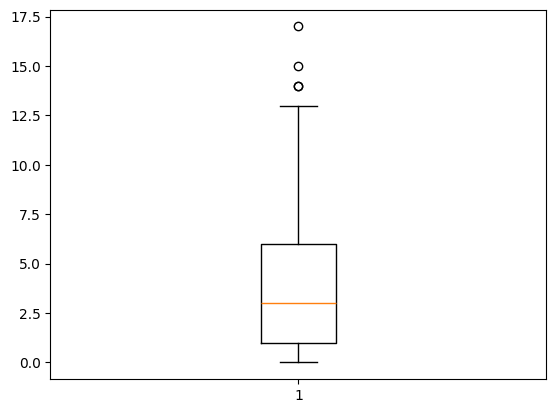

In [11]:
plt.boxplot(df['Pregnancies'])

{'whiskers': [<matplotlib.lines.Line2D at 0x232c6efbe30>,
 'caps': [<matplotlib.lines.Line2D at 0x232c6f3c410>,
 'boxes': [<matplotlib.lines.Line2D at 0x232c6efbbc0>],
 'medians': [<matplotlib.lines.Line2D at 0x232c6f3c920>],
 'fliers': [<matplotlib.lines.Line2D at 0x232c6f3cbf0>],
 'means': []}

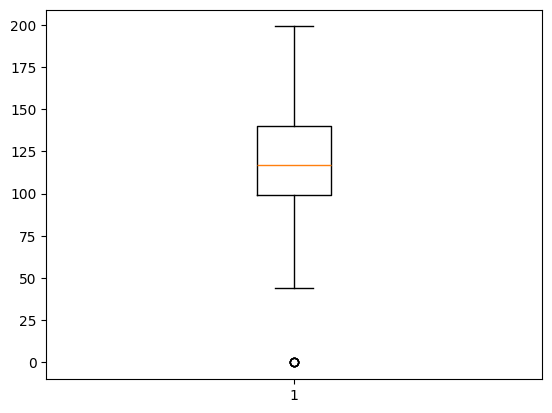

In [12]:
plt.boxplot(df['Glucose'])

{'whiskers': [<matplotlib.lines.Line2D at 0x232c6f4b3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x232c6f4b980>,
 'boxes': [<matplotlib.lines.Line2D at 0x232c6f4b110>],
 'medians': [<matplotlib.lines.Line2D at 0x232c6f4be30>],
 'fliers': [<matplotlib.lines.Line2D at 0x232c6f4c1a0>],
 'means': []}

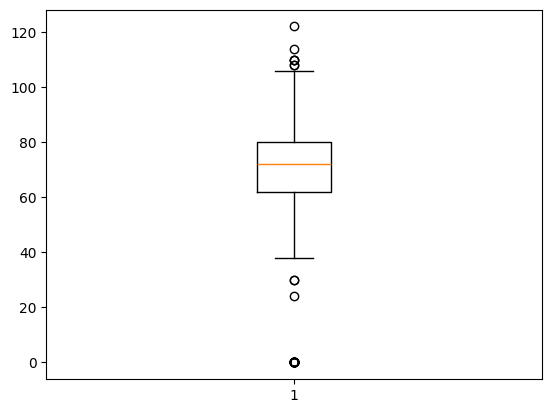

In [13]:
plt.boxplot(df['BloodPressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x232c7faa0c0>,
 'caps': [<matplotlib.lines.Line2D at 0x232c7faa6c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x232c7fa9dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x232c7faab40>],
 'fliers': [<matplotlib.lines.Line2D at 0x232c7faad80>],
 'means': []}

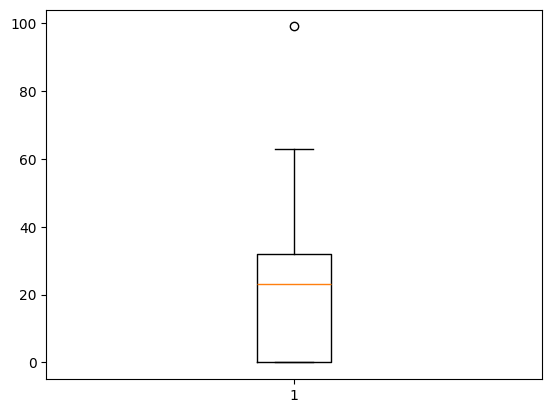

In [14]:
plt.boxplot(df['SkinThickness'])

In [32]:
X=df.drop('Outcome',axis=1)
y = df['Outcome']

In [48]:
ss = StandardScaler()

X = ss.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [86]:
y_prediction = svm_model.predict(X_train)

In [87]:
result = accuracy_score(y_train, y_prediction)

In [88]:
result

0.7736156351791531

In [89]:
X_test[3]

array([-1.14185152,  0.04334517, -0.0210444 , -0.6306536 , -0.41776815,
        0.56021731, -0.64593181,  1.59617091])

In [90]:
y_prediction = svm_model.predict([X_test[4]])

y_prediction

array([1], dtype=int64)

In [79]:
y_test

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64

In [91]:
if y_prediction[0] == 1:
    print('The person is diabetic')
else:
    print('The person is not diabetic')

The person is diabetic


In [92]:
import pickle

pickle.dump(svm_model, open('svm_model.pkl', 'wb'))